# Graphing using Matplotlib and Creating Interactive Plots and Animations

This data set comes from plotting the Prime numbers as the raduis and angle in polar coordinates. 
The spiral artifacts at smaller prime numbers and the transition seen to rays is documented here:
[Meaning of rays in polar plot of prime numbers](https://math.stackexchange.com/questions/885879/meaning-of-rays-in-polar-plot-of-prime-numbers)
Asked by user dwymark and answer by Greg Martin. A complete video animation and explaination on YouTube channel 3Blue1Brown created by Youtuber Grant Sanderson. The video [Why do prime numbers 
make these spirals? | Dirichlet’s theorem and pi approximations](https://www.youtube.com/watch?v=EK32jo7i5LQ)

## Using Jupyter Lab to create a dataset and pandas dataframe
### Introduction to 2d Plotting

In [1]:
import sympy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from ipywidgets import interact, widgets

%matplotlib widget
plt.style.use('dark_background')

Prime numbers between 0 and 100 using the [sybmolic math library](https://www.sympy.org/en/index.html).

In [2]:
num = 100
primes=list(sympy.primerange(0, num))
print(primes)
print("Number of primes under", num, "is", len(primes))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
Number of primes under 100 is 25


Convert the primes to a Cartesian coordinate system assuming the prime number represents both the degrees and radius of a polar coordinate.

- x = r cos(θ)
- y = r sin(θ)

Define a function for X and Y conversion.

In [3]:
def Xcartesian_from_polar_coordinates(x):
    return x * np.cos(x)
def Ycartesian_from_polar_coordinates(y):
    return y * np.sin(y)

Create a [pandas](https://pandas.pydata.org/docs/) dataframe of prime numbers, labeling the column "Primes" and display the first 5 rows.

In [4]:
df = pd.DataFrame(list(sympy.primerange(0, 500000)), columns=['Primes'])
df.head()

Primes
0       2
1       3
2       5
3       7
4      11

Calculate the coordinate conversion of the Prime numbers to X and Y columns in the dataframe. Save the pandas dataframe to a csv file or any other supported file time in the
pandas library such as pickle, json, xml, HDF, parquet, etc.

In [5]:
df['x']=df['Primes'].apply(Xcartesian_from_polar_coordinates)
df['y']=df['Primes'].apply(Ycartesian_from_polar_coordinates)
df.set_index('Primes', drop=True).to_csv('primes.csv')

Now the saved file can be used as the input to this analysis or in another program. Read back in 
the CSV file, set the Index to the Prime numbers, and display the first 5 rows.

In [6]:
df= pd.read_csv('primes.csv').set_index('Primes', drop=True)
df.head()

x          y
Primes                     
2      -0.832294   1.818595
3      -2.969977   0.423360
5       1.418311  -4.794621
7       5.277316   4.598906
11      0.048683 -10.999892

interactive(children=(IntSlider(value=5, description='zoom', max=90, min=1), Output()), _dom_classes=('widget-…

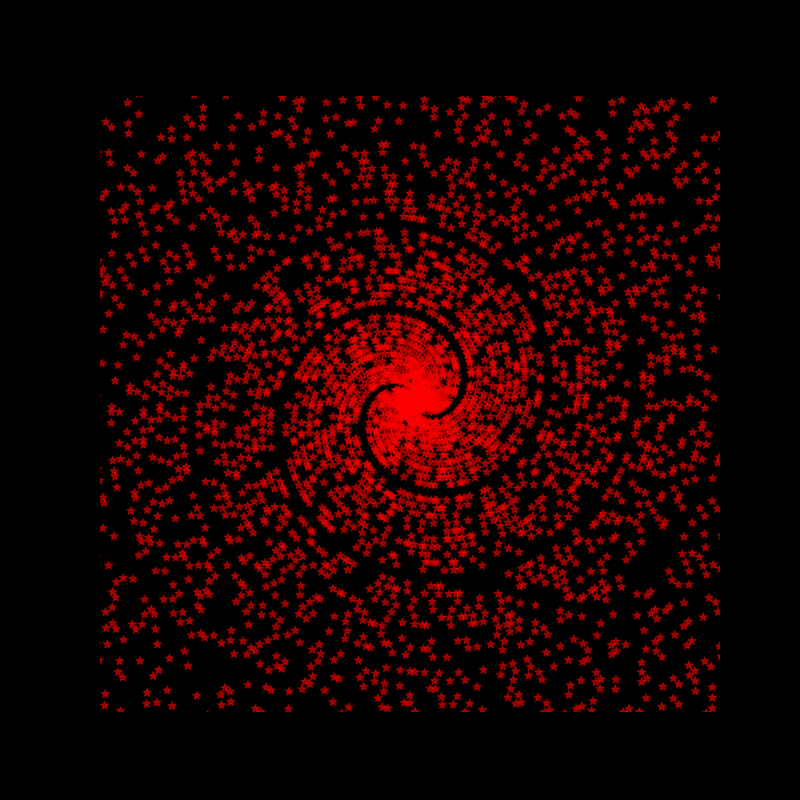

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
plt.axis("off")
# Set a color map
my_cmap = plt.get_cmap('hsv')
# Make a scatter plot
plt.scatter(df['x'],
            df['y'],
            alpha = 0.5,
            c = (df['x']**2 + df['y']**2),
            cmap = my_cmap, marker ='*')
fig.savefig('images/Figure1.png', dpi=fig.dpi)
# Interactive zoom slider
ax1 = plt.gca()
x_min, x_max = ax1.get_xlim()
def update(zoom=.01):
    if zoom is not None:
        zoom_factor = zoom /100
        x_center = (x_min + x_max ) / 2
        new_min = x_center - (x_max - x_min)/ 2 * zoom_factor
        new_max = x_center + (x_max - x_min)/ 2 * zoom_factor
        if new_max != new_min:
            ax1.set_xlim(new_min,new_max)
            ax1.set_ylim(new_min,new_max)
    fig.canvas.draw_idle()
interact(update, zoom=widgets.IntSlider(min=1, max=90, step=1, value=5));

![Figure of a prime spiral](images/Figure1.png "Interactive Zoom Figure 1")

### Turn the plot into function to create a series of plots

In [8]:
def plot_primes(primes_under = 1000):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.axis("off")
    # Set a color map
    my_cmap = plt.get_cmap('hsv')
    # index of the primes under a give number
    end_prime = df[df.index < primes_under].index[-1]
    title_text= "Prime numbers under " + str(primes_under)
    fig.suptitle( title_text )
    plt.scatter(df['x'].loc[2:end_prime],
                df['y'].loc[2:end_prime],
                alpha = 0.5,
                c = (df['x'].loc[2:end_prime]**2 + df['y'].loc[2:end_prime]**2),
                cmap = my_cmap, marker ='*')
    ax1 = plt.gca()
    x_min, x_max = ax1.get_xlim()
    filename = "images/" + title_text + ".png"
    fig.savefig(filename.replace(" ", "-"), dpi=fig.dpi)

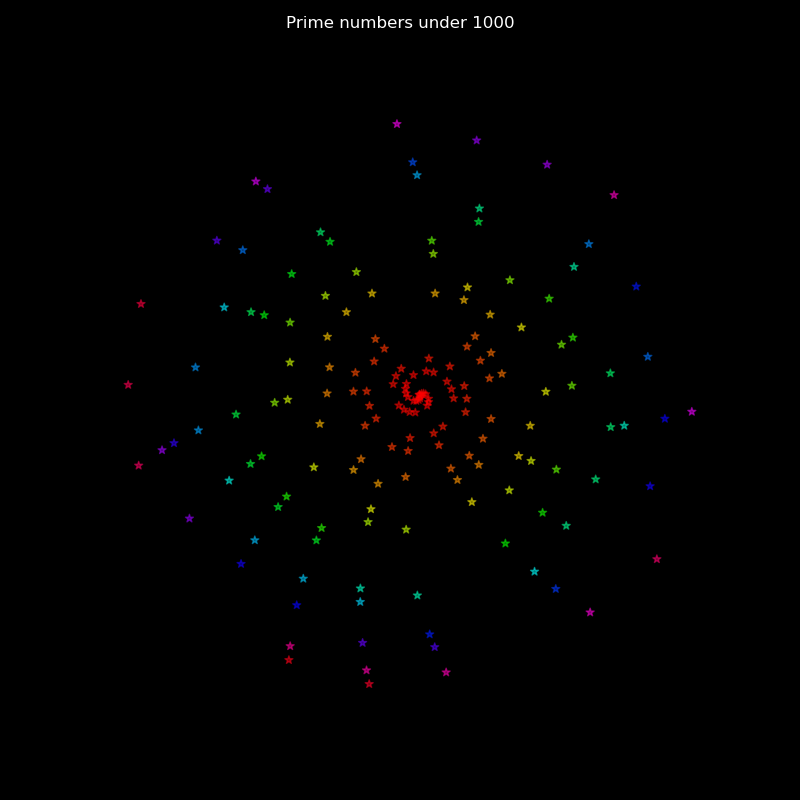

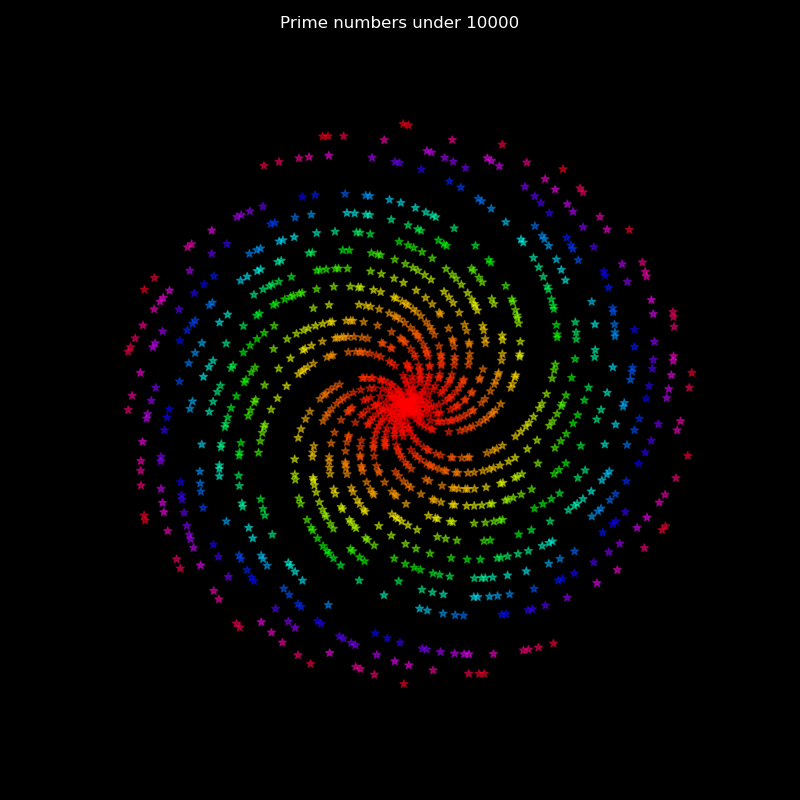

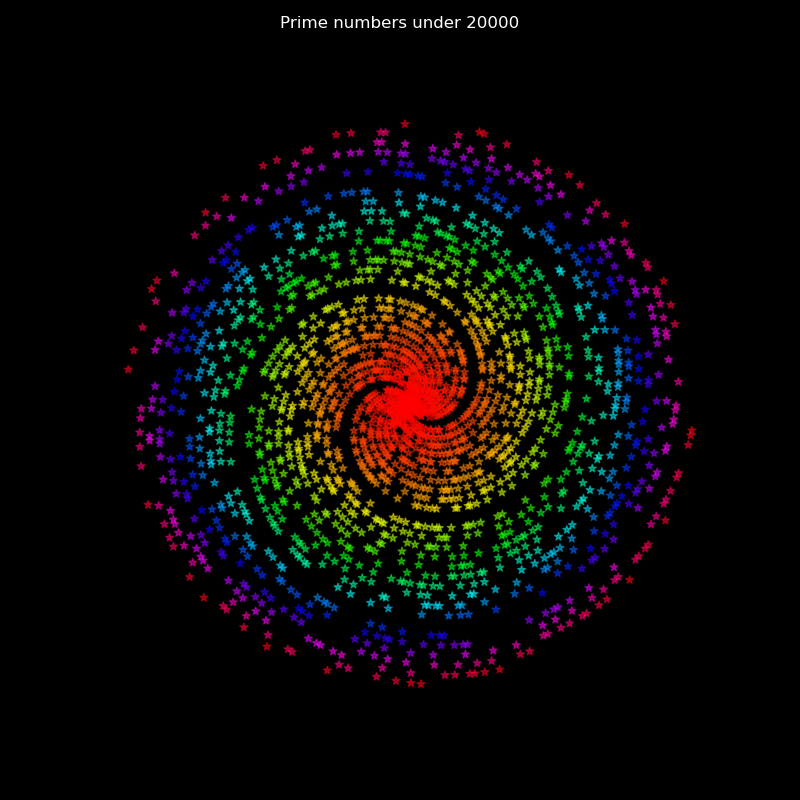

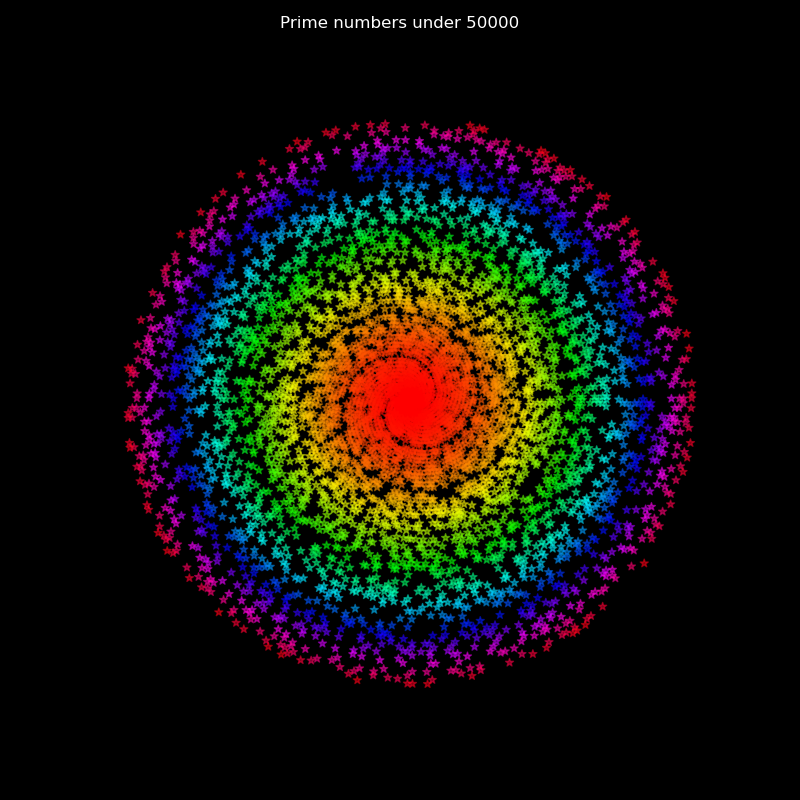

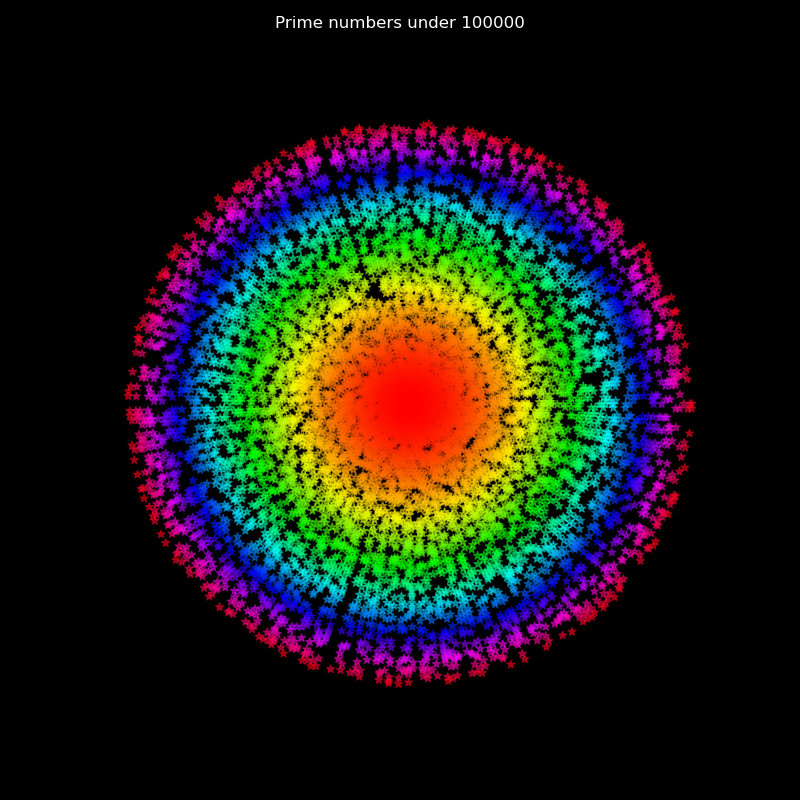

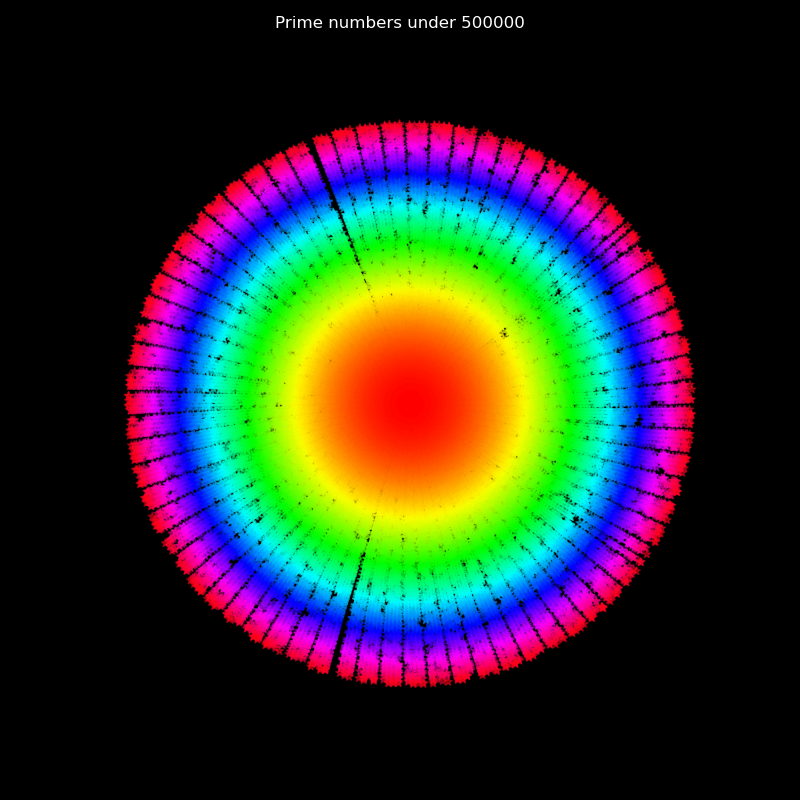

In [9]:
for i in [1000, 10000, 20000, 50000, 100000, 500000]:
    plot_primes(i)

![Plot of Primes under 1000](images/Prime-numbers-under-1000.png "Prime numbers under: 1000")

![Plot of Primes under 10000](images/Prime-numbers-under-10000.png "Prime numbers under: 10000")

![Plot of Primes under 20000](images/Prime-numbers-under-20000.png "Prime numbers under: 20000")

![Plot of Primes under 50000](images/Prime-numbers-under-50000.png "Prime numbers under: 50000")

![Plot of Primes under 100000](images/Prime-numbers-under-100000.png "Prime numbers under: 100000")

![Plot of Primes under 500000](images/Prime-numbers-under-500000.png "Prime numbers under: 500000")

### Create a animation

In [10]:
import matplotlib.animation as animation

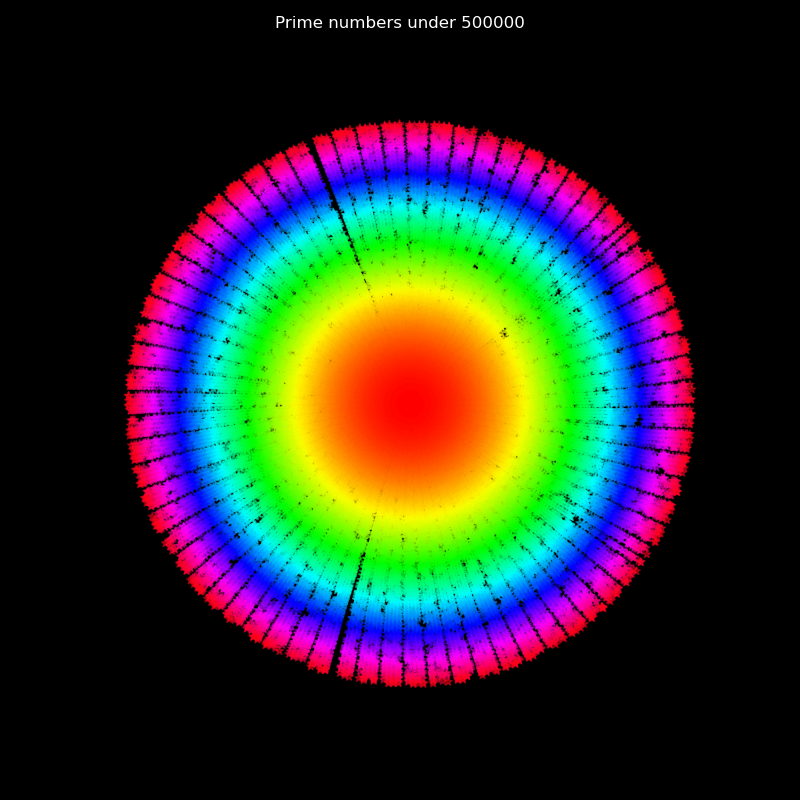

In [11]:
ani = animation.FuncAnimation(fig=fig, func=update, frames=100, interval=.1)
plt.show()

In [12]:
ani.save(filename="images/prime_animation_polar.gif", writer="pillow")


![Prime numbers spiral gif](images/prime_animation_polar.gif "Prime numbers spiral animation")